*COMP9016 - SS_R00183905 Summer Submission - Assignment - 2019/20*

### Section A
<br>**Note:** The code below either uses some classes and functions from the AIMA code repository. However any dependency that is required is directly embedded or reimplemented in the according subfolders. Therefore this implementation is a "stand alone" and an AIMA parent folder structure or otherwise external dependancy is NOT required.

![](images/header_part1.png)

In [1]:
from SS_R00183905_part1_main import *


======= SETTINGS =======
-> Initializing Global Settings
Agent Type Running: simple_reflex_agent


For part 1 of this assignment I’ve created a 2D world that simulates a huntsman (agent) hunting in the forest. There are two types of "game" to hunted (often referred to as “critter” in the code and comments). One are deer and the other rabbits. Furthermore there are huts generated in the world that function as rest points.

The agent is not allowed to spend more than two rounds in any of the huts. This functions as a general cool down timer (-1 per round not spend in a hut) in order not to either cheat the system or for an agent to get stuck in a hut through the rest percept.

The primary grading parameter is the overall **survival rate** of an agent and the secondary grading factor is the **performance** through hunting. Those are accrued as follows:

* Regular movement (north, south, east, west) : -3 energy / -1 performance
* Rest:  +20 energy per round / -2 performance
* Hunt Deer: -8 energy / +10 performance
* Hunt Rabbit: -5 energy / +3 performance

Please note that the **2D-world is setup as round**. For example in a 10x10 world, if an agent goes north from position 0,1 the next step will be at 9,1 (x=0,y=0 is the top left on the grid). This is taken into account for all internal model or search in part2 as well.

A *world cloning* option is available. That means that for each run the same world will be used. This is very handy when  trying to observe behaviour patterns on the same world many times in conjunction with a heatmap (see below). This works well with the simple reflex agent and model based agent.

The code is laid out so that the most important parameters can be passed into the global init settings directly to compare agents & scenarios easily:

The setup is as follows:

The critter division in the world is generally set as:

![](images/forest_critter_division.png)

And then run with (will not display anything but gathers all data):

To then see various statics data the following options are availble for part 1:
 * output_general_statistics()
 * graph_travel_and_rest_data()
 * graph_death_data()
 * graph_energy_data()
 * graph_performance_data()
 * graph_performance_histogram()
 * graph_critter_data()    
 * show_heatmap()   

Please note that heatmaps will show the starting position of the agent with an orange border and hut positions with a pink border. All agent types can be found in the agent_variants.py file under the lib_part1 folder.

## Simple Reflex Agent

I've included this agent as the basic benchmark to compare the other agents with. It moves randomly and only acts on environment precepts when there are some. It "knows" nothing of survival and has no plan. Comparing a random approach to survive this 2D world with an increased planned approach should show the pros and cons of the various implementations. 

This is the code implementation of the reflex agent:

![](images/code_agent_1.png)

This is how the agent performs in a high populated 10x10 world:

In [2]:
agent = simple_reflex_agent
clone = True
world_x = 10
world_y = 10
stepsPerGame = 100
runs = 100 # will run the world x times (each with stepsPerGame times for the agent)
critter_density = 'high' # options: high, medium, low
hut_density = 'high' # options: high, medium, low

settings.init_settings(agent, clone, world_x, world_y, stepsPerGame, runs, critter_density , hut_density) 
settings.init_debug_settings()
settings.init_statistics_data()

launch_world(settings.number_of_runs)


======= SETTINGS =======
-> Initializing Global Settings
Agent Type Running: simple_reflex_agent
-> Initializing Global Debug Settings
-> Initializing Statistics Containers


In [3]:
output_general_statistics()


======= STATISTICS =======
Total number of runs: 100
Set total rounds per run: 100
Avg. rounds per game played: 80.79

----- Agent Survival -----
Agent deaths total: 29 (Equals: 29.0 % of total games)
Agent survived (all rounds): 71 (Equals: 71.0 % of total games)

----- Critter Stats -----
Average number of critters alive at end of game: 53.06 
(Equals: 88.43 % of total.)

----- Performance Goals -----
The agent achieved the following performance scores:
10 points: 60 times ( 60.0 % of total rounds)
20 points: 33 times ( 33.0 % of total rounds)
30 points: 10 times ( 10.0 % of total rounds)
40 points: 1 times ( 1.0 % of total rounds)
50 points: 1 times ( 1.0 % of total rounds)
60 points: 0 times ( 0.0 % of total rounds)
70 points: 0 times ( 0.0 % of total rounds)
80 points: 0 times ( 0.0 % of total rounds)
90 points: 0 times ( 0.0 % of total rounds)
100 points: 0 times ( 0.0 % of total rounds)


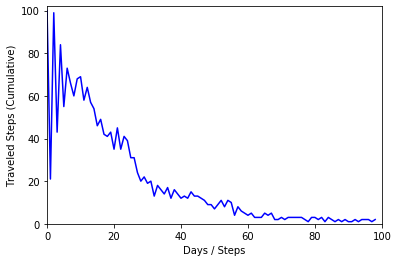

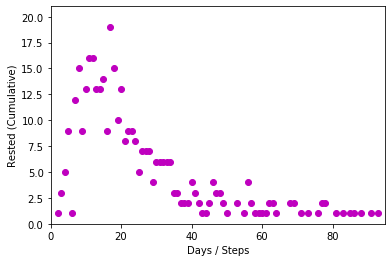

In [4]:
graph_travel_and_rest_data()

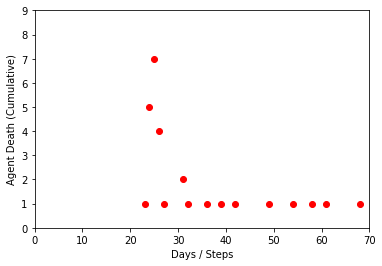

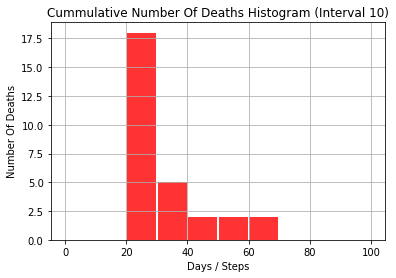

In [5]:
graph_death_data()

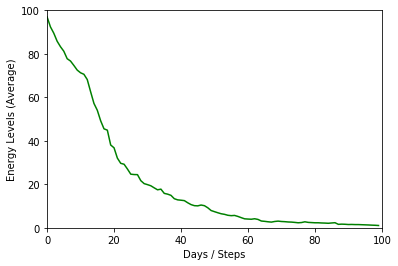

In [6]:
graph_energy_data()

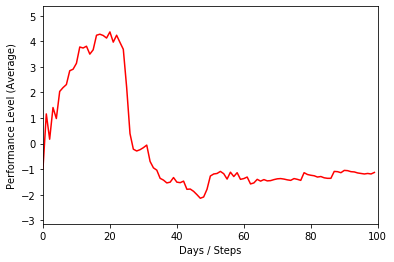

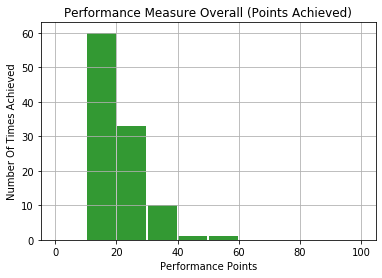

In [7]:
graph_performance_data()
graph_performance_histogram()

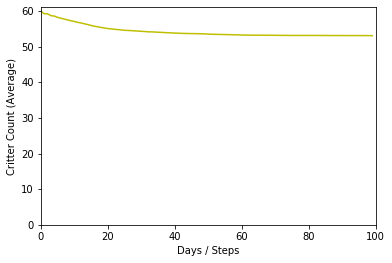

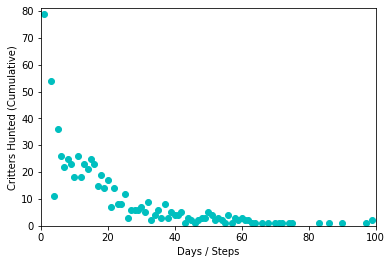

In [8]:
graph_critter_data()

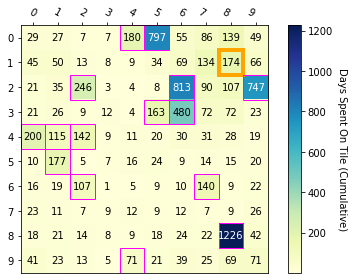

In [9]:
show_heatmap()

It is evident that the simple reflex agent will stay more frequently at hut locations due to the nature and constraint of its implementation.

## Model Based Agent

This agent is programmed to remember where it has been in order to avoid repeat movements. A relaxed approach is given that if the agent is “trapped” by its own previous decisions it will ignore the previous locations and do a random step instead. Other than that it will act the same way on precepts as the reflex agent does.

The first part of the implementation is as follows:

![](images/code_agent_2.png)


In [10]:
agent = model_based_agent
clone = True
world_x = 10
world_y = 10
stepsPerGame = 100
runs = 100 # will run the world x times (each with stepsPerGame times for the agent)
critter_density = 'high' # options: high, medium, low
hut_density = 'high' # options: high, medium, low

settings.init_settings(agent, clone, world_x, world_y, stepsPerGame, runs, critter_density , hut_density) 
settings.init_debug_settings()
settings.init_statistics_data()

launch_world(settings.number_of_runs)


======= SETTINGS =======
-> Initializing Global Settings
Agent Type Running: model_based_agent
-> Initializing Global Debug Settings
-> Initializing Statistics Containers



======= STATISTICS =======
Total number of runs: 100
Set total rounds per run: 100
Avg. rounds per game played: 87.15

----- Agent Survival -----
Agent deaths total: 18 (Equals: 18.0 % of total games)
Agent survived (all rounds): 82 (Equals: 82.0 % of total games)

----- Critter Stats -----
Average number of critters alive at end of game: 52.2 
(Equals: 87.0 % of total.)

----- Performance Goals -----
The agent achieved the following performance scores:
10 points: 95 times ( 95.0 % of total rounds)
20 points: 69 times ( 69.0 % of total rounds)
30 points: 39 times ( 39.0 % of total rounds)
40 points: 17 times ( 17.0 % of total rounds)
50 points: 7 times ( 7.0 % of total rounds)
60 points: 1 times ( 1.0 % of total rounds)
70 points: 0 times ( 0.0 % of total rounds)
80 points: 0 times ( 0.0 % of total rounds)
90 points: 0 times ( 0.0 % of total rounds)
100 points: 0 times ( 0.0 % of total rounds)


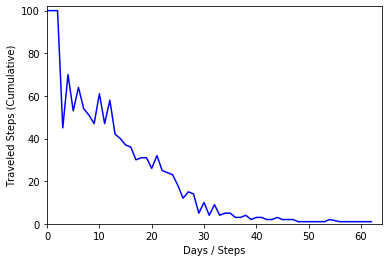

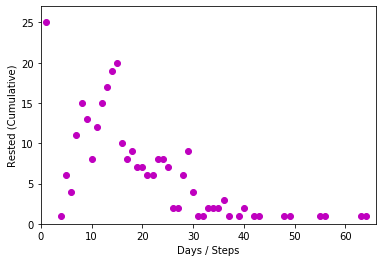

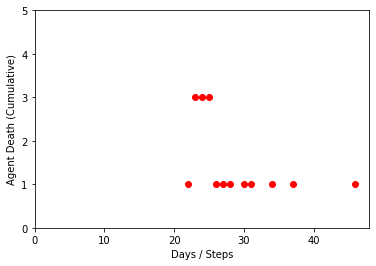

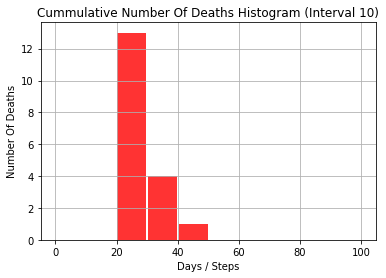

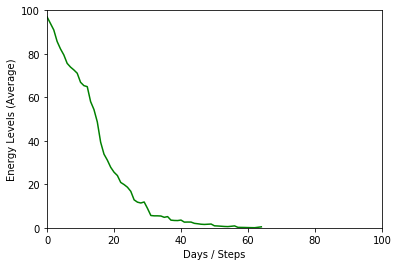

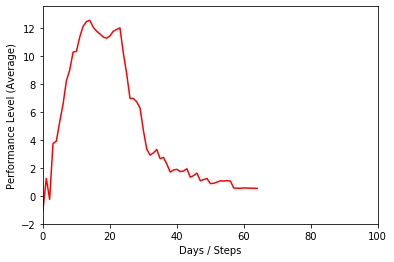

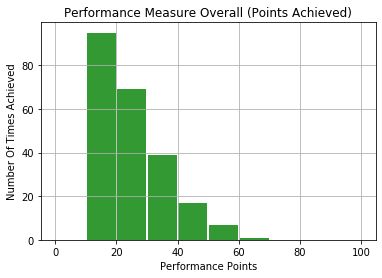

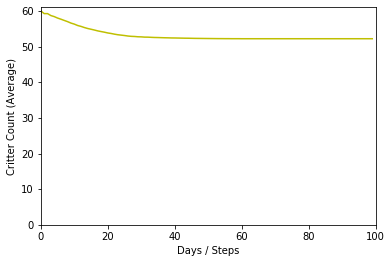

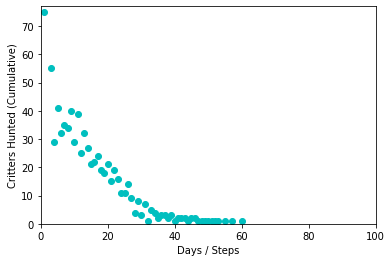

In [11]:
# condensed here for easier scrolling:
output_general_statistics()
graph_travel_and_rest_data()
graph_death_data()
graph_energy_data()
graph_performance_data()
graph_performance_histogram()
graph_critter_data()


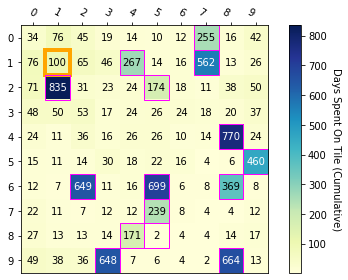

In [12]:
show_heatmap()

## Utility Based Agent

This agent has a radius of 1 field that it can "see" what is in the neighbor tile. It also keeps track of the world and knows where previously found huts are. Furthermore it can act on various states such as low health and is able to ignore huts when it doesn't need and actively seek out huts when the health reaches a lower threshold. Basically keeping track of an inner state, the world and decide where to go next. It makes sense to turn world "cloning" off here or else the heat map will show exactly the same (this will turn off starting & hut position indicators).

The first part of the code implementaion is as follows:

![](images/code_agent_3.png)


In [13]:
agent = utility_based_agent
clone = False
world_x = 10
world_y = 10
stepsPerGame = 100
runs = 100 # will run the world x times (each with stepsPerGame times for the agent)
critter_density = 'high' # options: high, medium, low
hut_density = 'high' # options: high, medium, low

settings.init_settings(agent, clone, world_x, world_y, stepsPerGame, runs, critter_density , hut_density) 
settings.init_debug_settings()
settings.init_statistics_data()

launch_world(settings.number_of_runs)


======= SETTINGS =======
-> Initializing Global Settings
Agent Type Running: utility_based_agent
-> Initializing Global Debug Settings
-> Initializing Statistics Containers



======= STATISTICS =======
Total number of runs: 100
Set total rounds per run: 100
Avg. rounds per game played: 100.0

----- Agent Survival -----
Agent survived 100% of runs.

----- Critter Stats -----
Average number of critters alive at end of game: 41.89 
(Equals: 69.82 % of total.)

----- Performance Goals -----
The agent achieved the following performance scores:
10 points: 100 times ( 100.0 % of total rounds)
20 points: 100 times ( 100.0 % of total rounds)
30 points: 100 times ( 100.0 % of total rounds)
40 points: 98 times ( 98.0 % of total rounds)
50 points: 95 times ( 95.0 % of total rounds)
60 points: 85 times ( 85.0 % of total rounds)
70 points: 58 times ( 58.0 % of total rounds)
80 points: 31 times ( 31.0 % of total rounds)
90 points: 20 times ( 20.0 % of total rounds)
100 points: 6 times ( 6.0 % of total rounds)


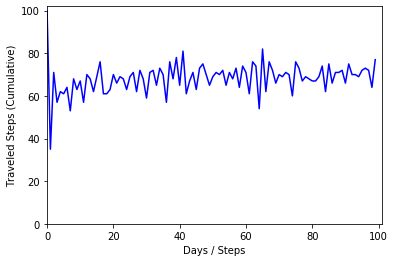

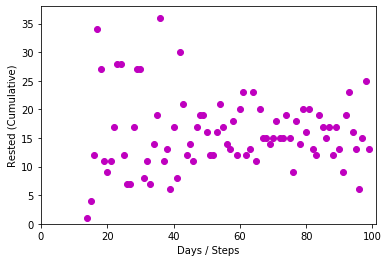

No Agent Deaths Occured!


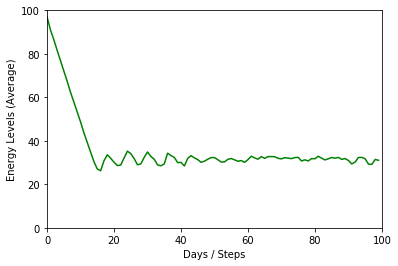

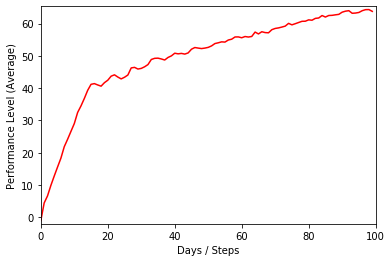

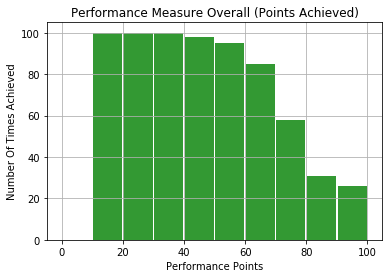

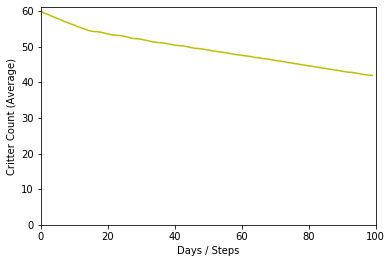

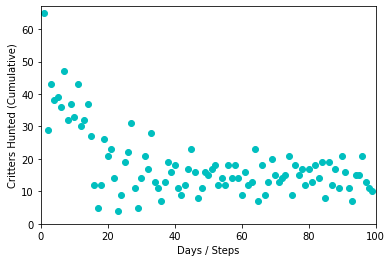

In [14]:
# condensed here for easier scrolling:
output_general_statistics()
graph_travel_and_rest_data()
graph_death_data()
graph_energy_data()
graph_performance_data()
graph_performance_histogram()
graph_critter_data()

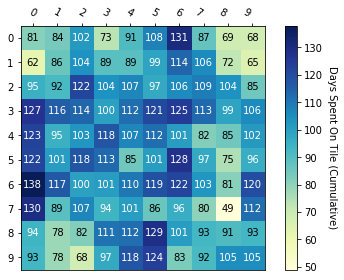

In [15]:
show_heatmap()

## NOTEABLE DIFFERENCES

Reflex Agent:
- average 80 rounds of games played
- survives in average 71% of games
- achieves mostly 10 points in performance (60%+ of games)
- about 88% of critters left end of the game

Model Based Agent:
- average 87 rounds of games played
- survives in average 82% of games
- performance more balanced with over 50% in the 20+ points region
- also about 87% of critters left end of the game

Utility Based Agent:
- average 100 rounds of games played
- survives in average 100% of games
- performance very effective (always achieves at least 30 with over 50% in 70 point region)
- about 70% of critters left end of the game in average

## MORE DIFFICULT ENVIRONMENT

When reducing the critter population as well as huts in varying sizes of the world the agents are notably more appart. 

For example a Reflex Agent is much less able to survive past rounds 15-25 with a very low performance score overall. In large worlds with little critters the utiliy agent manages to survive for much longer than the model or reflex agents but also struggles to achieve a good performance score overall.

## PEAS

All three agents share commonalities. Their sensors are defined in their own agent program and will take in the precepts as returned (defined) in the environment. The actuators will turn defined or decided outcomes through their own program into results.

In my example the sensors will pick up the are critters on the tile or a hut. For the utility based agent they will even look ahead one additional field and see the overall area (+1 on either side). The actuators can either decide for the outcome to be to hunt, rest or travel in a program specified direction as outlined for each agent above and detailed in their respective code implementations.

All three are in the same environment and share the same performance measures which is primarily to survive for as long as possible and achieve an overall high performance score for hunting critters over time.


![](images/header_part2.png)

In [16]:
from SS_R00183905_part2_main import *

## Prerequisites & Setup

As part of the below search implementation the Node class as well as search functions from the AIMA repository have been implemented and accordingly modified here. All required files are included.

I have adapted my world from part 1 in so far that search is applicable at first on a simple search. There are only 2 "things" added to the world. The huntsman and a single hut. The huntsman has to find the hut in order to complete the search. The overall aim is to enable the agent to avoid random moves but to plan ahead and achieve the set out goal with the least amount of moves.

The various states are defined in the implementation. Those are: actions (movement through the grid), initial state of the grid (hut or not) and the goal state (finding the hut).

## Problem Statement

The actions are only movement (in all 4 directions) for this example. Again the world is round in this case. A goal test function checks if the goal state (location of the hut) has been reached. Each step adds the costs of 1. The implementation can be seen below:

![](images/code_search_1.png)

The starting point is marked as the orange framed coordinate and the end point (hut) as the different colored coordinate in purple.

## Uninformed Search Types

The three search types I've included are breadth first search, depth first search and depth limited search. Those are implemented as below:

### Breadth First Search

The search type uses are "First In First Out" (FIFO) approach. That means that every state for the depth is evaluated before it can increase. In this example it translates into the best solution with the shortest path. Breadth first search is complete in this limited world of 10x10. The search challenge increases with a larger search space.


======= SETTINGS =======
-> Initializing Global Settings
Search Type Running: BFS
-> Initializing Global Debug Settings
-> Initializing Statistics Containers

======= SEARCH RESULTS =======

Nodes Expanded: 104
Solution is: [(4, 8), (3, 8), (2, 8), (1, 8), (0, 8)]


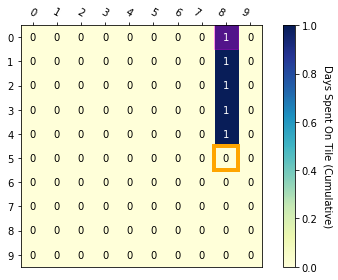

In [17]:
# options for 2nd param: 'BFS' , 'DFS', ' DLS'
# options 3rd param = DFS limit

settings.init_settings(search_agent, 'BFS') 
settings.init_debug_settings() 
settings.init_statistics_data() 

launch_world(settings.number_of_runs)
output_search_statistics()
show_heatmap()

### Depth First Search

Opposite to BFS this search type uses a Last In First Out (LIFO) method. It expands the last condition (Node) straight away until a loop occurs. As can be clearly seen in this example (heatmap) it is a bad choice. Expanding towards the deepest Node first can lead to extremly long paths before the goal is achieved. However the overall outcome can vary as a result of changing the priority of actions. Similar to BFS this is a complete search.


======= SETTINGS =======
-> Initializing Global Settings
Search Type Running: DFS
-> Initializing Global Debug Settings
-> Initializing Statistics Containers

======= SEARCH RESULTS =======

Nodes Expanded: 156
Solution is: [(3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (8, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (4, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]


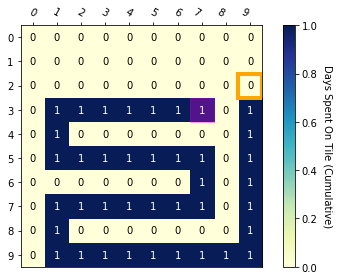

In [18]:
# options for 2nd param: 'BFS' , 'DFS', ' DLS'
# options 3rd param = DFS limit

settings.init_settings(search_agent, 'DFS') 
settings.init_debug_settings() 
settings.init_statistics_data() 

launch_world(settings.number_of_runs)
output_search_statistics()
show_heatmap()

### Comparison

It is evident that BFS (104 Nodes expanded resulting in 5 steps) wins over DFS (156 Nodes expanded resulting in 29 steps). However this is also due to the limited 10x10 search space as provided with the given world. For larger search spaces where solutions are "buried deep" inside the search tree DFS might outperform BFS in speed and required memory usage. The middle ground could potentially be a DFS with a limiter as shown below:

### Additional: Depth Limited Search

An additionally implemented search is the DLS algorithm. Similar to DFS the search depth (Node expansion) can be preset. In a known world this may lead to excellent results. In this example there were 704 Nodes expanded with 10 steps taken as a result.


======= SETTINGS =======
-> Initializing Global Settings
Search Type Running: DLS
DLS limit: 10
-> Initializing Global Debug Settings
-> Initializing Statistics Containers

======= SEARCH RESULTS =======

Nodes Expanded: 704
Solution is: [(2, 3), (1, 3), (0, 3), (0, 2), (0, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5)]


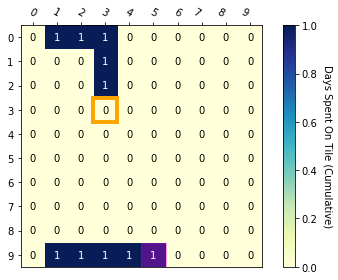

In [19]:
# options for 2nd param: 'BFS' , 'DFS', ' DLS'
# options 3rd param = DFS limit

settings.init_settings(search_agent, 'DLS', 10) 
settings.init_debug_settings() 
settings.init_statistics_data() 

launch_world(settings.number_of_runs)
output_search_statistics()
show_heatmap()

![](images/header_part3.png)

In [20]:
from SS_R00183905_part3_main import *

## Analysis

Forward and backward chaining allow for a coherent logic that builds upon a connection of data (or checkpoints). Instead of being solely dependant on the perception of states a rationale between them is introduced.

To achieve this a 'language' or 'grammar' is used that can be described as logic sentences. Those outline the goal set by the specific environment or space and are typically held in a knowledge base.

The knowledge base helps the agent perform in situations where a regular search approach is not ideal.

### Forward Chaining

Forward chaining looks at the known facts to support a goal state. The process aims to find further data until the goal state is reached and confirmed through a series of inference rules. It can be described as a data-driven approach meaning that the goal is reached by use of the available data.

It test for all of the available rules which can in general generate an infinite number of possible conclusions.

### Backward Chaining

Opposite to that backward chaining looks at the goal first and moves backward in order to find the required facts through inference rules. Therefore it is a goal-driven approach. Smaller sub-goals help to extract the data.

It only tests for required rules to reach a goal state and not all available rules as Forward Chaining does. This results in a finite number of conclusions.

### Application

In my 2D "Huntsman" world there are several possible ways to reach the goal state through perception inference. The major goal is to hunt all critters that are available. For this version I have bent the rules slightly to utilize inference. Instead of searching the world space as previously, the specific goal in this demonstration is find all deer tracks. With those the Huntsman agent can then infer the exact position of the Deer instead of stumbling upon it as was the case previously.

This allows for a generally more sophisticated application where a form of planning is involved. Therefore the new goal is to find all relevant deer tracks.

![](images/forest_tracks.png)

In the example below forward chaining is utilized in a 6x6 modified world. There are only 2 deers and the huntsman in the world. The starting positions are set to static in this demo. The difference is, that each deer has tracks surrounding it to the north, east, south and west.

Through bending some of the rules here, the huntsman is not allowed to step on a deer tile but will infer the location of the deer once all tracks have been identified.

The heatmap (further down) shows the setup with the following color codes:
* orange: huntsman starting position
* green: deer tiles
* pink: deer tracks

All clauses that will lead to the final goal state have been implemented dynamically as sentences as follows (example): <br>**TRACKS32 & TRACKS43 & TRACKS52 & TRACKS41 ==> DEER42** through the init_clauses() function in world.py:
![](images/code_tracks_1.png)

The final goal state is marked as "SUCCESS". Please note that for this implementation demo the agent has been simplified into a random walk agent! The initial clauses are inserted into the knowledge base and further findings are also fed into it: <br>
![](images/code_tracks_2.png)

And finally for every agent step the knowledge base is checked for the goal state (query_percepts_and_update() function). The pl_fc_entails() function from the aima code repository has been utilized for this purpose. The example can be run as follows:

In [33]:
maxGameSteps=500
settings.init_settings(random_movement_agent, gameSteps=maxGameSteps)
settings.init_debug_settings()
settings.init_statistics_data()


======= SETTINGS =======
-> Initializing Global Settings
Agent Type Running: random_movement_agent
-> Initializing Global Debug Settings
-> Initializing Statistics Containers


In [34]:
world = launch_world(settings.number_of_runs)

In [32]:
output_general_statistics()


======= STATISTICS =======
Max total rounds for this run set: 150
Rounds per game played until all SUCCESS entailments (all deer tracks found) are valid: 150.0


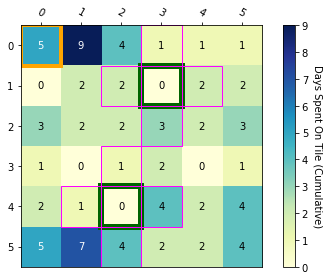

In [26]:
show_heatmap()

A print out of the agent clauses will show all of the accumulated clauses:

In [35]:
print(world.agent_knowledge_base.clauses)

[((((TRACKS03 & TRACKS14) & TRACKS23) & TRACKS12) ==> DEER13), ((((TRACKS32 & TRACKS43) & TRACKS52) & TRACKS41) ==> DEER42), ((DEER13 & DEER42) ==> SUCCESS), notracks00, notracks50, notracks40, notracks30, notracks45, notracks44, TRACKS43, notracks33, TRACKS32, notracks22, notracks21, notracks11, notracks01, notracks05, notracks04, notracks55, notracks31, TRACKS12, TRACKS23, notracks20, notracks25, notracks10, notracks15, TRACKS14, notracks24, notracks02, notracks35, notracks34, notracks51, TRACKS52, notracks54, TRACKS41, TRACKS03]
